In [51]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("data/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
df.shape

(7043, 21)

In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [8]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

# Data cleaning and maniuplation

In [9]:
df[pd.to_numeric(df['TotalCharges'], errors='coerce').isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


Total charges were a string, it turns out that 11 of them weren't numeric, that's only 0.16% of the total data, so I'll just drop it

In [10]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [11]:
df.dropna(inplace=True)

In [12]:
#df["SeniorCitizen"] = df["SeniorCitizen"].replace({"Yes":1,"No":0})
df["gender"] = df["gender"].replace({"Male":1,"Female":0})
df["Partner"] = df["Partner"].replace({"Yes":1,"No":0})
df["Dependents"] = df["Dependents"].replace({"Yes":1,"No":0})
df["PhoneService"] = df["PhoneService"].replace({"Yes":1,"No":0})
df["PaperlessBilling"] = df["PaperlessBilling"].replace({"Yes":1,"No":0})
df["Churn"] = df["Churn"].replace({"Yes":1,"No":0})

In [13]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1
5,9305-CDSKC,0,0,0,0,8,1,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,99.65,820.50,1
6,1452-KIOVK,1,0,0,1,22,1,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,1,Credit card (automatic),89.10,1949.40,0
7,6713-OKOMC,0,0,0,0,10,0,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,0,Mailed check,29.75,301.90,0
8,7892-POOKP,0,0,1,0,28,1,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,1,Electronic check,104.80,3046.05,1
9,6388-TABGU,1,0,0,1,62,1,No,DSL,Yes,...,No,No,No,No,One year,0,Bank transfer (automatic),56.15,3487.95,0


In [14]:
#replace 'No internet service' to No for the following columns
replace_cols = [ 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport','StreamingTV', 'StreamingMovies']
for i in replace_cols : 
    df[i]  = df[i].replace({"Yes":1,"No":0,"No internet service":0})

In [15]:
df['MultipleLines']  = df['MultipleLines'].replace({"Yes":1,"No":0,"No phone service":0})

In [16]:
df['MultipleLines'] = pd.to_numeric(df['MultipleLines'], errors='coerce')

In [17]:
df[pd.to_numeric(df['MultipleLines'], errors='coerce').isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [18]:
df = pd.get_dummies(df, columns=['InternetService']).drop('InternetService_No', axis=1)

In [19]:
df = pd.get_dummies(df, columns=['Contract']).drop('Contract_Month-to-month', axis=1)

In [20]:
df = pd.get_dummies(df, columns=['PaymentMethod']).drop('PaymentMethod_Mailed check', axis=1)

In [21]:
df['Churn'].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

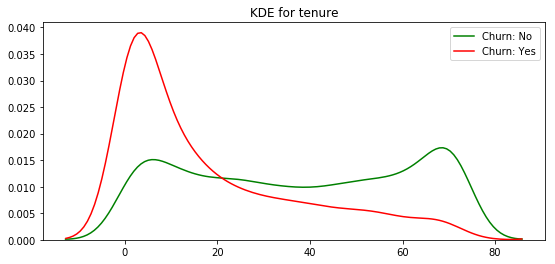

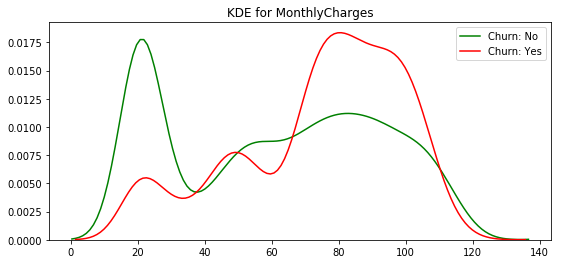

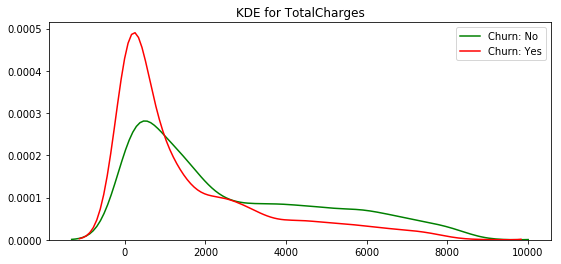

In [22]:
def kdeplot(feature):
    plt.figure(figsize=(9, 4))
    plt.title("KDE for {}".format(feature))
    ax0 = sns.kdeplot(df[df['Churn'] == 0][feature].dropna(), color= 'green', label= 'Churn: No')
    ax1 = sns.kdeplot(df[df['Churn'] == 1][feature].dropna(), color= 'red', label= 'Churn: Yes')
kdeplot('tenure')
kdeplot('MonthlyCharges')
kdeplot('TotalCharges')

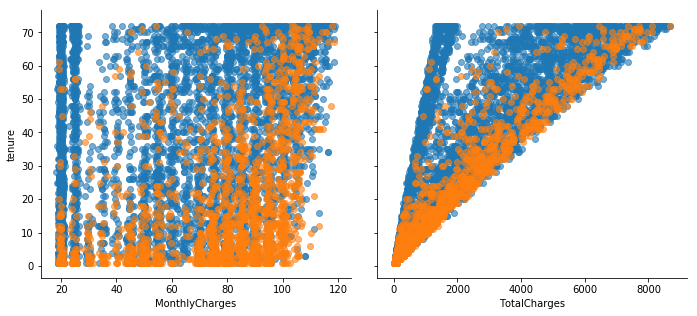

In [23]:
g = sns.PairGrid(df, y_vars=["tenure"], x_vars=["MonthlyCharges", "TotalCharges"], height=4.5, hue="Churn", aspect=1.1)
ax = g.map(plt.scatter, alpha=0.6)

In [24]:
df[['gender','Churn']].apply(pd.Series.value_counts)

,gender,Churn
0,3483,5163
1,3549,1869


In [25]:
def binary_vs_churn(ax, col, name1, name2):
    labels = [name1+', Not Churned', name1+', Churned', name2+', Not Churned', name2+', Churned']


    df[[col,'Churn']].groupby([col, 'Churn']).size().plot.bar(color=['green','red'], ax=ax)

    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
    
    ax.set_xticklabels(labels)

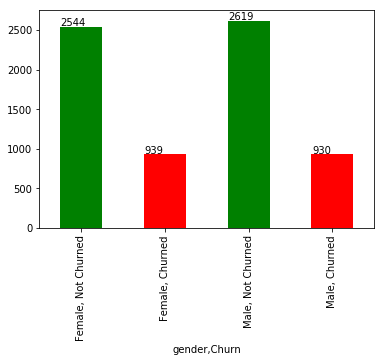

In [26]:
fig,ax = plt.subplots()
binary_vs_churn(ax ,'gender','Female','Male')

In [27]:
df.nunique()

customerID                                 7032
gender                                        2
SeniorCitizen                                 2
Partner                                       2
Dependents                                    2
tenure                                       72
PhoneService                                  2
MultipleLines                                 2
OnlineSecurity                                2
OnlineBackup                                  2
DeviceProtection                              2
TechSupport                                   2
StreamingTV                                   2
StreamingMovies                               2
PaperlessBilling                              2
MonthlyCharges                             1584
TotalCharges                               6530
Churn                                         2
InternetService_DSL                           2
InternetService_Fiber optic                   2
Contract_One year                       

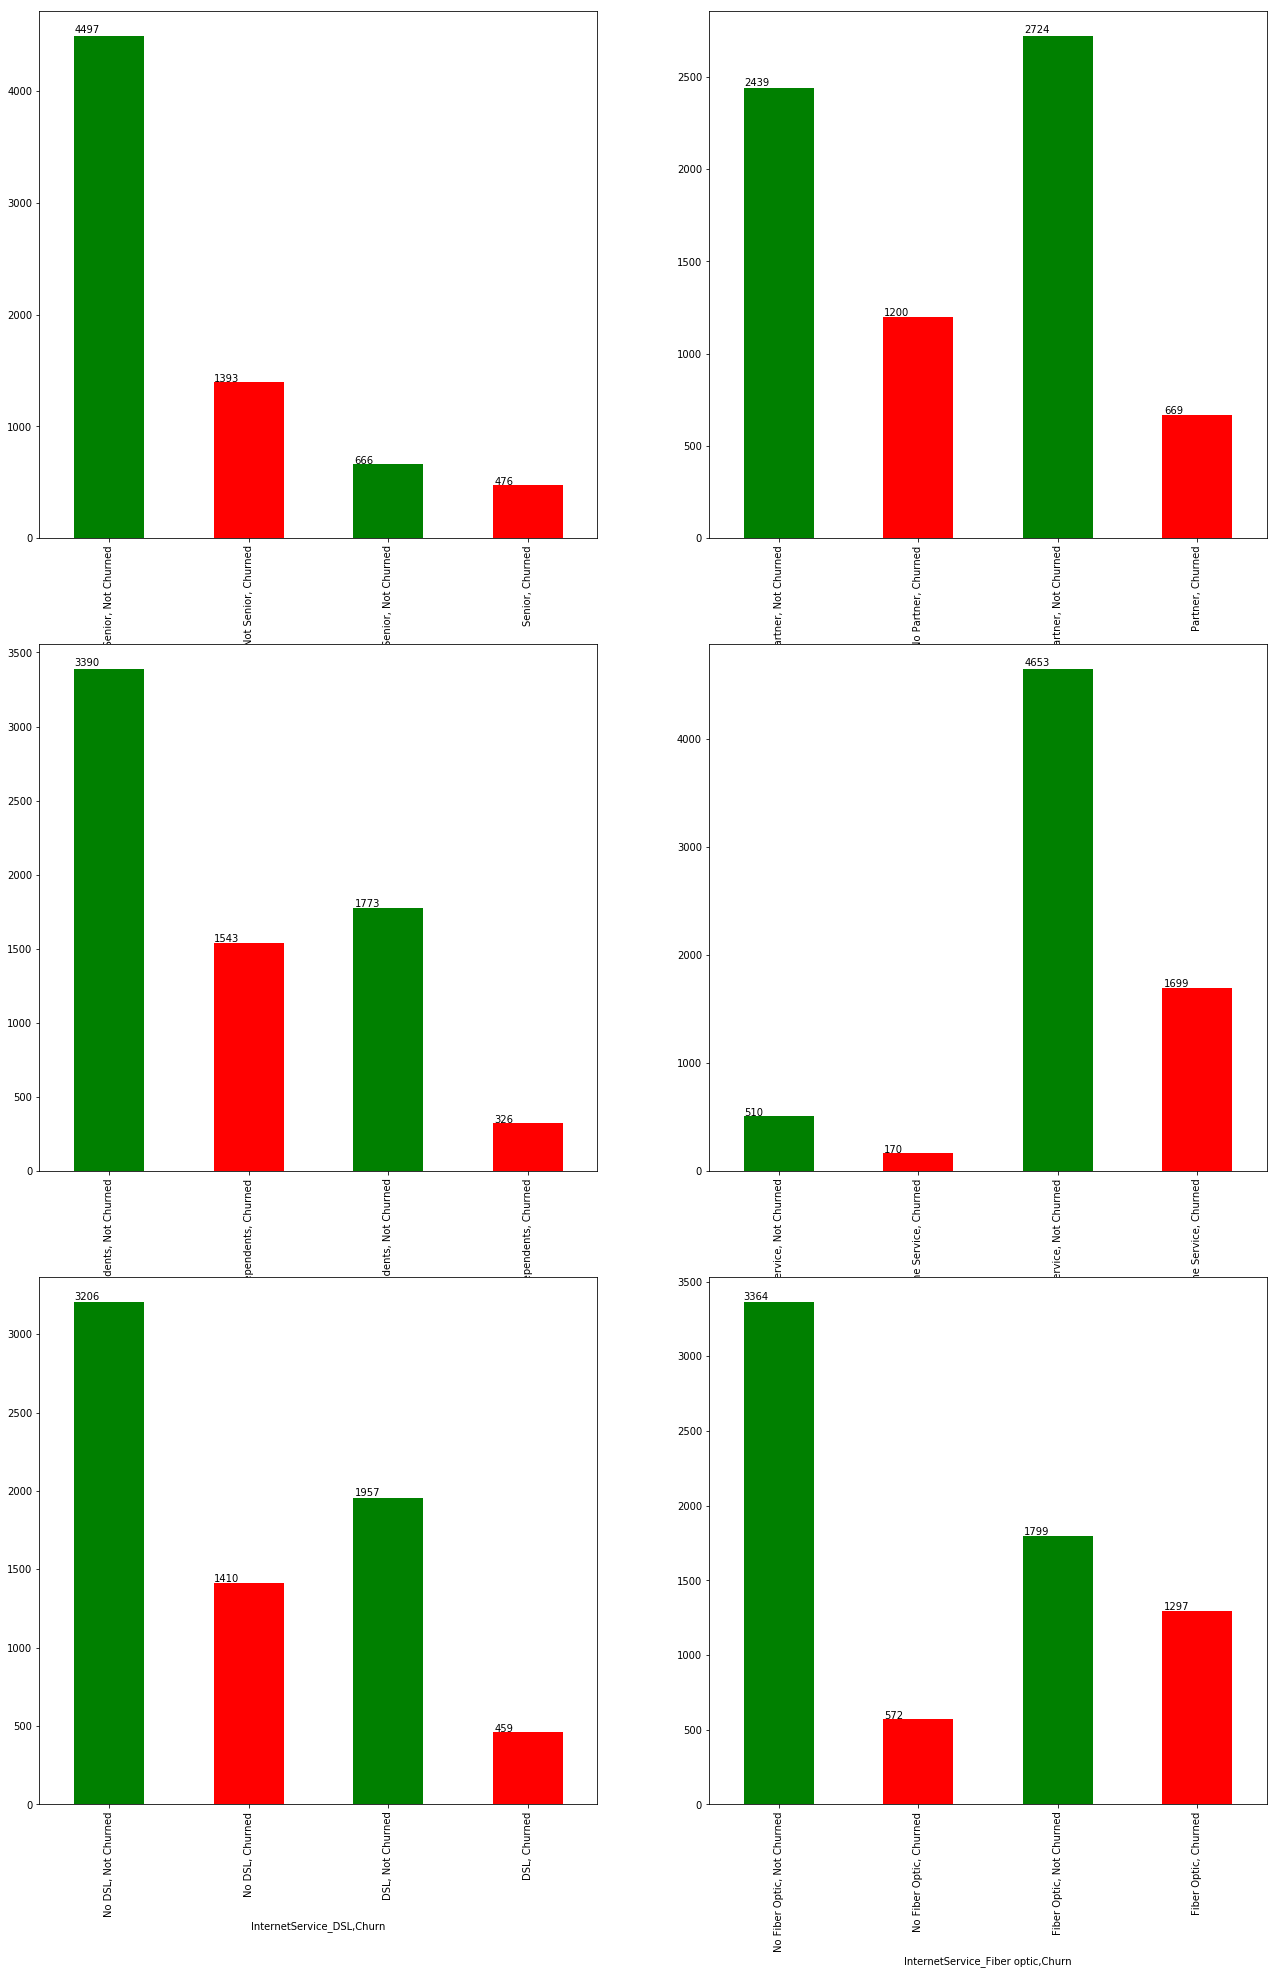

In [28]:
fig,ax = plt.subplots(3,2, figsize=(22,33))
binary_vs_churn(ax[0,0],'SeniorCitizen','Not Senior','Senior')
binary_vs_churn(ax[0,1],'Partner','No Partner','Partner')
binary_vs_churn(ax[1,0],'Dependents','No Dependents','Has Dependents')
binary_vs_churn(ax[1,1],'PhoneService','No Phone Service','Phone Service')
binary_vs_churn(ax[2,0],'InternetService_DSL','No DSL','DSL')
binary_vs_churn(ax[2,1],'InternetService_Fiber optic','No Fiber Optic','Fiber Optic')

In [29]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,...,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.504693,0.162400,0.482509,0.298493,32.421786,0.903299,0.421928,0.286547,0.344852,0.343857,...,64.798208,2283.300441,0.265785,0.343572,0.440273,0.209329,0.239619,0.219283,0.216297,0.336320
std,0.500014,0.368844,0.499729,0.457629,24.545260,0.295571,0.493902,0.452180,0.475354,0.475028,...,30.085974,2266.771362,0.441782,0.474934,0.496455,0.406858,0.426881,0.413790,0.411748,0.472483
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,35.587500,401.450000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,70.350000,1397.475000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,89.862500,3794.737500,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
df.isnull().sum()

customerID                                 0
gender                                     0
SeniorCitizen                              0
Partner                                    0
Dependents                                 0
tenure                                     0
PhoneService                               0
MultipleLines                              0
OnlineSecurity                             0
OnlineBackup                               0
DeviceProtection                           0
TechSupport                                0
StreamingTV                                0
StreamingMovies                            0
PaperlessBilling                           0
MonthlyCharges                             0
TotalCharges                               0
Churn                                      0
InternetService_DSL                        0
InternetService_Fiber optic                0
Contract_One year                          0
Contract_Two year                          0
PaymentMet

# RANDOM FOREST

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import  cross_val_score,GridSearchCV
from sklearn.model_selection import train_test_split

In [32]:
X = df

In [33]:
X

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check
0,7590-VHVEG,0,0,1,0,1,0,0,0,1,...,29.85,29.85,0,1,0,0,0,0,0,1
1,5575-GNVDE,1,0,0,0,34,1,0,1,0,...,56.95,1889.50,0,1,0,1,0,0,0,0
2,3668-QPYBK,1,0,0,0,2,1,0,1,1,...,53.85,108.15,1,1,0,0,0,0,0,0
3,7795-CFOCW,1,0,0,0,45,0,0,1,0,...,42.30,1840.75,0,1,0,1,0,1,0,0
4,9237-HQITU,0,0,0,0,2,1,0,0,0,...,70.70,151.65,1,0,1,0,0,0,0,1
5,9305-CDSKC,0,0,0,0,8,1,1,0,0,...,99.65,820.50,1,0,1,0,0,0,0,1
6,1452-KIOVK,1,0,0,1,22,1,1,0,1,...,89.10,1949.40,0,0,1,0,0,0,1,0
7,6713-OKOMC,0,0,0,0,10,0,0,1,0,...,29.75,301.90,0,1,0,0,0,0,0,0
8,7892-POOKP,0,0,1,0,28,1,1,0,0,...,104.80,3046.05,1,0,1,0,0,0,0,1
9,6388-TABGU,1,0,0,1,62,1,0,1,1,...,56.15,3487.95,0,1,0,1,0,1,0,0


In [34]:
X.drop('customerID',axis=1, inplace=True)

In [35]:
y = X.pop('Churn')

In [36]:
from sklearn.preprocessing import StandardScaler
feature_scaler = StandardScaler()
X = feature_scaler.fit_transform(X)

/home/lawrence/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/lawrence/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [38]:
rf = RandomForestClassifier()

In [39]:
rf.fit(X_train, y_train)

/home/lawrence/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [40]:
cv_score = cross_val_score(rf, X_train, y_train, cv=10)

In [43]:
print(cv_score)
cv_score.mean()

[0.78601695 0.78177966 0.79193206 0.75583864 0.77919321 0.76220807
 0.78556263 0.78768577 0.78131635 0.7893617 ]


0.7800895042658086

In [44]:
param_grid  = { 
                'n_estimators' : [500,1200],
               # 'min_samples_split': [2,5,10,15,100],
               # 'min_samples_leaf': [1,2,5,10],
                'max_depth': range(1,5,2),
                'max_features' : ('log2', 'sqrt'),
                'class_weight':[{1: w} for w in [1,1.5]]
              }

In [45]:
GridRF = GridSearchCV(RandomForestClassifier(), param_grid)

In [46]:
GridRF.fit(X_train, y_train)

/home/lawrence/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [500, 1200], 'max_depth': range(1, 5, 2), 'max_features': ('log2', 'sqrt'), 'class_weight': [{1: 1}, {1: 1.5}]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [47]:
GridRF.best_score_

0.801316068775207

In [48]:
GridRF.cv_results_

/home/lawrence/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/lawrence/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/lawrence/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/lawrence/anaconda3/

{'mean_fit_time': array([0.38337262, 0.93903764, 0.4070913 , 0.90261523, 0.50975506,
        1.23483849, 0.50778723, 1.33945894, 0.48501134, 0.98646228,
        0.37830472, 0.98978082, 0.66320928, 1.49074411, 0.51943215,
        1.27483114]),
 'std_fit_time': array([0.00644549, 0.04760284, 0.02503482, 0.00050325, 0.00423912,
        0.01086602, 0.00856587, 0.02447384, 0.02112111, 0.09605652,
        0.00558214, 0.06164815, 0.09271442, 0.22293837, 0.00979979,
        0.05919423]),
 'mean_score_time': array([0.0559574 , 0.13802965, 0.05520399, 0.13485726, 0.06938879,
        0.16738478, 0.0678877 , 0.16734401, 0.06253521, 0.13401397,
        0.05635055, 0.18777402, 0.07267515, 0.18718727, 0.07459513,
        0.16560864]),
 'std_score_time': array([0.00019132, 0.00527982, 0.00021082, 0.00272029, 0.00419292,
        0.00416403, 0.00065262, 0.00151994, 0.00741933, 0.00161244,
        0.0008285 , 0.0538608 , 0.00285003, 0.01896372, 0.00435771,
        0.00468766]),
 'param_class_weight': mas

In [49]:
confusion_matrix(y_train, rf.predict(X_train))

array([[3442,   10],
       [  70, 1189]])

In [50]:
GridRF.feature_importances_

AttributeError: 'GridSearchCV' object has no attribute 'feature_importances_'

# SVM

In [42]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [52]:
predicted = svclassifier.predict(X_test)
accuracy_score(y_test, predicted)

0.7957776820336062

In [53]:
svclassifier = SVC(kernel='poly')
svclassifier.fit(X_train, y_train)
predicted = svclassifier.predict(X_test)
accuracy_score(y_test, predicted)

/home/lawrence/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.7970702283498492

In [55]:
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, y_train)
predicted = svclassifier.predict(X_test)
accuracy_score(y_test, predicted)

/home/lawrence/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.7962085308056872

In [56]:
svclassifier = SVC(kernel='sigmoid')
svclassifier.fit(X_train, y_train)
predicted = svclassifier.predict(X_test)
accuracy_score(y_test, predicted)

/home/lawrence/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.7470917707884532

# adaboost

In [57]:
from sklearn.ensemble import AdaBoostClassifier
adaclassifier = AdaBoostClassifier(n_estimators=100, random_state=0)
adaclassifier.fit(X_train, y_train)
predicted = adaclassifier.predict(X_test)
accuracy_score(y_test, predicted)

0.8026712623869022

# XG boost